In [1]:
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(eps,r,nx,ny,nz,ax,ay,az):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0
    pad = 3.0
    geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax+1,ny*ay+1,nz*az+1))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=eps)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    geometry.append(mp.Block(center=mp.Vector3(0,0, (nz*az+pad)/2.0), size=mp.Vector3(nx*ax, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(0,0,-(nz*az+pad)/2.0), size=mp.Vector3(nx*ax, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0,0), size=mp.Vector3(pad, ny*ay, nz*az),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0,0), size=mp.Vector3(pad, ny*ay, nz*az),material=mp.air))
    
    geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0, (nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0, (nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0,-(nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0,-(nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    
    geometry.append(mp.Block(center=mp.Vector3(0, (ny*ay+pad)/2.0,0), size=mp.Vector3(nx*ax+2*pad, pad, nz*az+2*pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(0,-(ny*ay+pad)/2.0,0), size=mp.Vector3(nx*ax+2*pad, pad, nz*az+2*pad),material=mp.air))
    geometry.append(mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4))
    return geometry, geometry_lattice

In [ ]:
#supercell size
nx = 17
ny = 10
nz = 7
r = 0.0725 #rod radius
eps = 32 #material epsilon
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(eps,r,nx,ny,nz,ax,ay,az)
L = math.sqrt(3)/4.0
c4 = mp.Vector3(0,0,L/2)
vx = mp.Vector3(ax,0.0,0.0)
#geometry.append(mp.Cylinder(center=c4+1*vx,radius=r, material=mp.air, height=L, axis=c4))
#geometry.append(mp.Cylinder(center=c4-1*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4+2*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4-2*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4+3*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4-3*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4+4*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4-4*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4+5*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4-5*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4+6*vx,radius=r, material=mp.air, height=L, axis=c4))
geometry.append(mp.Cylinder(center=c4-6*vx,radius=r, material=mp.air, height=L, axis=c4))

dpml = 1.0

cell = mp.Vector3(nx*ax+2*dpml,ny*ay+2*dpml,nz*az+2*dpml)

resolution = 25
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.2,0,az/8.0)

fcen = 0.54
df = 0.05 
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)

#h = mp.Harminv(mp.Ez, pos, fcen, df)
#sim.run(mp.after_sources(h), until_after_sources=100)

#m = h.modes[0]
#f = m.freq
#Q = m.Q
#sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=100)
#sim.run(until=100)

def f(r, Ex,Ey,Ez):
    V1 = Ex*Ex.conjugate()+Ey*Ey.conjugate()+Ez*Ez.conjugate()
    return V1*0.5

fv = []
def Field_Evaluation(sim):
    DE = sim.electric_energy_in_box(center=mp.Vector3(), size=cell)
    EE = sim.integrate_field_function([mp.Ex, mp.Ey, mp.Ez], f, mp.Volume(size=cell, center=mp.Vector3(0,0,0)))
    fv.append((DE-EE)/DE)
    print((DE-EE)/DE)

    #    
sim.run(mp.at_every(10,Field_Evaluation), until_after_sources=100)
#mp.output_epsilon(sim)
#mp.output_efield_z(sim)

In [ ]:
data=[0.617724084968, 0.625309479199, 0.623492127222, 0.602091554773, 0.42241787327, 0.586648781898, 0.621298879476, 0.621622198563, 0.536653227525, 0.422981517449, 0.452411704057, 0.47674274131, 0.582345427901, 0.423935000611, 0.423190723215,0.42323156781,0.423201542893,0.423190027951,0.423187784628,0.423186641176,0.423186642886,0.423186642856,0.423186638914,0.423186641158,0.423186642784,0.42318664166,0.423186642915,0.423186640836]
import matplotlib.pyplot as plt
plt.plot(data)

In [ ]:
plt.plot(fv)

In [24]:
import math
import meep as mp
#supercell size
nx = 10
ny = 6
nz = 1
r = 0.0725 #rod radius
eps = 32 #material epsilon
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
L = math.sqrt(3)/4.0
hs = math.sqrt(3)/12.0
pad = 3.0
geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax+1,ny*ay+1,nz*az+1))
#v1 = mp.Vector3(1)

#displace vector to fill the whole supercell
v2 = mp.Vector3(0.5*ax,0.5*ay,0)
v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

m = mp.Medium(epsilon=eps)
#center of the four supercell rod
c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
c4 = mp.Vector3(0,0,L/2)
geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
#geometry.append(mp.Block(center=mp.Vector3(0,0, (nz*az+pad)/2.0), size=mp.Vector3(nx*ax, ny*ay, pad),material=mp.air))
#geometry.append(mp.Block(center=mp.Vector3(0,0,-(nz*az+pad)/2.0), size=mp.Vector3(nx*ax, ny*ay, pad),material=mp.air))
geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0,0), size=mp.Vector3(pad, ny*ay, nz*az),material=mp.air))
geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0,0), size=mp.Vector3(pad, ny*ay, nz*az),material=mp.air))
    
#geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0, (nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
#geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0, (nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
#geometry.append(mp.Block(center=mp.Vector3( (nx*ax+pad)/2.0,0,-(nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
#geometry.append(mp.Block(center=mp.Vector3(-(nx*ax+pad)/2.0,0,-(nz*az+pad)/2.0), size=mp.Vector3(pad, ny*ay, pad),material=mp.air))
    
geometry.append(mp.Block(center=mp.Vector3(0, (ny*ay+pad)/2.0,0), size=mp.Vector3(nx*ax+2*pad, pad, nz*az+2*pad),material=mp.air))
geometry.append(mp.Block(center=mp.Vector3(0,-(ny*ay+pad)/2.0,0), size=mp.Vector3(nx*ax+2*pad, pad, nz*az+2*pad),material=mp.air))
geometry.append(mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4))

dpml = 1.0
cell = mp.Vector3(nx*ax+2*dpml,ny*ay+2*dpml,nz*az)

resolution = 25
pml_layers = [mp.PML(dpml,direction=mp.X),mp.PML(dpml,direction=mp.Y)]
pos = mp.Vector3(0.0,0,az/8.0)

fcen = 0.54
df = 0.4 
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
#kz = 0.2
#sim.k_point = mp.Vector3(0,0,kz)
#h = mp.Harminv(mp.Ez, pos, fcen, df)
k_interp = 10
sim.run_k_points(300, mp.interpolate(k_interp, [mp.Vector3(), mp.Vector3(0,0,0.5)]))
#sim.run(mp.at_beginning(mp.output_epsilon),mp.after_sources(h), until_after_sources=100)
#sim.run(mp.at_beginning(mp.output_epsilon),
#        mp.after_sources(mp.Harminv(mp.Ez, pos, fcen, df)),
#        until_after_sources=100)
mp.output_efield_z(sim)

-----------
Initializing structure...
Meep progress: 0.44/325.0 = 0.1% done in 4.0s, 2950.7s to go
Meep progress: 1.96/325.0 = 0.6% done in 8.0s, 1326.2s to go
Meep progress: 3.48/325.0 = 1.1% done in 12.1s, 1117.5s to go
Meep progress: 5.0/325.0 = 1.5% done in 16.1s, 1031.9s to go
Meep progress: 6.52/325.0 = 2.0% done in 20.1s, 983.3s to go
Meep progress: 8.04/325.0 = 2.5% done in 24.2s, 953.2s to go
Meep progress: 9.56/325.0 = 2.9% done in 28.2s, 930.8s to go
Meep progress: 11.08/325.0 = 3.4% done in 32.3s, 913.8s to go
Meep progress: 12.6/325.0 = 3.9% done in 36.3s, 899.3s to go
Meep progress: 14.1/325.0 = 4.3% done in 40.3s, 888.2s to go
Meep progress: 15.62/325.0 = 4.8% done in 44.3s, 877.5s to go
Meep progress: 17.14/325.0 = 5.3% done in 48.3s, 868.2s to go
Meep progress: 18.66/325.0 = 5.7% done in 52.4s, 859.7s to go
Meep progress: 20.18/325.0 = 6.2% done in 56.4s, 851.8s to go
Meep progress: 21.7/325.0 = 6.7% done in 60.4s, 844.4s to go
Meep progress: 23.22/325.0 = 7.1% done in

Meep progress: 197.48/325.0 = 60.8% done in 527.6s, 340.7s to go
Meep progress: 199.0/325.0 = 61.2% done in 531.6s, 336.6s to go
Meep progress: 200.52/325.0 = 61.7% done in 535.7s, 332.5s to go
Meep progress: 202.04/325.0 = 62.2% done in 539.7s, 328.5s to go
Meep progress: 203.56/325.0 = 62.6% done in 543.7s, 324.4s to go
Meep progress: 205.08/325.0 = 63.1% done in 547.8s, 320.3s to go
Meep progress: 206.6/325.0 = 63.6% done in 551.8s, 316.2s to go
Meep progress: 208.12/325.0 = 64.0% done in 555.8s, 312.2s to go
Meep progress: 209.64/325.0 = 64.5% done in 559.9s, 308.1s to go
Meep progress: 211.16/325.0 = 65.0% done in 563.9s, 304.0s to go
Meep progress: 212.68/325.0 = 65.4% done in 567.9s, 299.9s to go
Meep progress: 214.2/325.0 = 65.9% done in 571.9s, 295.9s to go
Meep progress: 215.72/325.0 = 66.4% done in 576.0s, 291.8s to go
Meep progress: 217.22/325.0 = 66.8% done in 580.0s, 287.8s to go
Meep progress: 218.74/325.0 = 67.3% done in 584.0s, 283.7s to go
Meep progress: 220.26/325.0 

Meep progress: 28.98/325.0 = 8.9% done in 157.9s, 1612.8s to go
Meep progress: 29.74/325.0 = 9.2% done in 162.0s, 1607.9s to go
Meep progress: 30.5/325.0 = 9.4% done in 166.0s, 1602.9s to go
Meep progress: 31.26/325.0 = 9.6% done in 170.0s, 1597.8s to go
Meep progress: 32.02/325.0 = 9.9% done in 174.1s, 1593.0s to go
Meep progress: 32.78/325.0 = 10.1% done in 178.2s, 1588.3s to go
Meep progress: 33.54/325.0 = 10.3% done in 182.2s, 1583.6s to go
Meep progress: 34.3/325.0 = 10.6% done in 186.3s, 1578.8s to go
Meep progress: 35.06/325.0 = 10.8% done in 190.3s, 1573.9s to go
Meep progress: 35.8/325.0 = 11.0% done in 194.3s, 1569.8s to go
Meep progress: 36.56/325.0 = 11.2% done in 198.4s, 1565.2s to go
Meep progress: 37.32/325.0 = 11.5% done in 202.4s, 1560.5s to go
Meep progress: 38.08/325.0 = 11.7% done in 206.5s, 1555.9s to go
Meep progress: 38.84/325.0 = 12.0% done in 210.6s, 1551.3s to go
Meep progress: 39.6/325.0 = 12.2% done in 214.6s, 1546.7s to go
Meep progress: 40.36/325.0 = 12.4%

Meep progress: 126.98/325.0 = 39.1% done in 679.7s, 1060.0s to go
Meep progress: 127.74/325.0 = 39.3% done in 683.7s, 1055.9s to go
Meep progress: 128.5/325.0 = 39.5% done in 687.8s, 1051.7s to go
Meep progress: 129.26/325.0 = 39.8% done in 691.8s, 1047.6s to go
Meep progress: 130.02/325.0 = 40.0% done in 695.8s, 1043.5s to go
Meep progress: 130.78/325.0 = 40.2% done in 699.9s, 1039.4s to go
Meep progress: 131.54/325.0 = 40.5% done in 703.9s, 1035.3s to go
Meep progress: 132.3/325.0 = 40.7% done in 708.0s, 1031.2s to go
Meep progress: 133.06/325.0 = 40.9% done in 712.0s, 1027.1s to go
Meep progress: 133.82/325.0 = 41.2% done in 716.0s, 1022.9s to go
Meep progress: 134.58/325.0 = 41.4% done in 720.1s, 1018.8s to go
Meep progress: 135.34/325.0 = 41.6% done in 724.1s, 1014.7s to go
Meep progress: 136.1/325.0 = 41.9% done in 728.1s, 1010.6s to go
Meep progress: 136.86/325.0 = 42.1% done in 732.2s, 1006.5s to go
Meep progress: 137.62/325.0 = 42.3% done in 736.2s, 1002.4s to go
Meep progress

Meep progress: 221.98/325.0 = 68.3% done in 1184.5s, 549.7s to go
Meep progress: 222.74/325.0 = 68.5% done in 1188.5s, 545.6s to go
Meep progress: 223.5/325.0 = 68.8% done in 1192.6s, 541.6s to go
Meep progress: 224.26/325.0 = 69.0% done in 1196.6s, 537.5s to go
Meep progress: 225.02/325.0 = 69.2% done in 1200.7s, 533.5s to go
Meep progress: 225.78/325.0 = 69.5% done in 1204.7s, 529.4s to go
Meep progress: 226.54/325.0 = 69.7% done in 1208.7s, 525.3s to go
Meep progress: 227.3/325.0 = 69.9% done in 1212.7s, 521.3s to go
Meep progress: 228.06/325.0 = 70.2% done in 1216.8s, 517.2s to go
Meep progress: 228.82/325.0 = 70.4% done in 1220.9s, 513.2s to go
Meep progress: 229.58/325.0 = 70.6% done in 1224.9s, 509.1s to go
Meep progress: 230.34/325.0 = 70.9% done in 1228.9s, 505.0s to go
Meep progress: 231.1/325.0 = 71.1% done in 1233.0s, 501.0s to go
Meep progress: 231.86/325.0 = 71.3% done in 1237.0s, 496.9s to go
Meep progress: 232.62/325.0 = 71.6% done in 1241.1s, 492.9s to go
Meep progress

Meep progress: 318.48/325.0 = 98.0% done in 1697.8s, 34.8s to go
Meep progress: 319.24/325.0 = 98.2% done in 1701.8s, 30.7s to go
Meep progress: 320.0/325.0 = 98.5% done in 1705.9s, 26.7s to go
Meep progress: 320.76/325.0 = 98.7% done in 1709.9s, 22.6s to go
Meep progress: 321.52/325.0 = 98.9% done in 1713.9s, 18.6s to go
Meep progress: 322.28/325.0 = 99.2% done in 1718.0s, 14.5s to go
Meep progress: 323.04/325.0 = 99.4% done in 1722.0s, 10.4s to go
Meep progress: 323.8/325.0 = 99.6% done in 1726.1s, 6.4s to go
Meep progress: 324.56/325.0 = 99.9% done in 1730.1s, 2.3s to go
harminv1:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv1:, 0.534979855285, -2.26052632217e-08, 11833081.7482, 13.9406005032, 4.91961472356-13.0436855743i, 1.89502613719e-10+0.0i
harminv1:, 0.681029509322, -0.000449762014717, 757.099851742, 0.00273382309764, 0.00227279021631-0.00151928054086i, 9.47743058317e-07+0.0i
harminv1:, 0.699610465049, -0.00337149697668, 103.753684178, 0.0122111534021, -0.0066962

Meep progress: 86.42/325.0 = 26.6% done in 460.5s, 1271.4s to go
Meep progress: 87.18/325.0 = 26.8% done in 464.6s, 1267.3s to go
Meep progress: 87.94/325.0 = 27.1% done in 468.6s, 1263.2s to go
Meep progress: 88.7/325.0 = 27.3% done in 472.6s, 1259.1s to go
Meep progress: 89.46/325.0 = 27.5% done in 476.7s, 1255.1s to go
Meep progress: 90.22/325.0 = 27.8% done in 480.7s, 1251.0s to go
Meep progress: 90.98/325.0 = 28.0% done in 484.7s, 1246.9s to go
Meep progress: 91.74/325.0 = 28.2% done in 488.8s, 1242.8s to go
Meep progress: 92.5/325.0 = 28.5% done in 492.8s, 1238.7s to go
Meep progress: 93.26/325.0 = 28.7% done in 496.9s, 1234.6s to go
Meep progress: 94.02/325.0 = 28.9% done in 500.9s, 1230.6s to go
Meep progress: 94.78/325.0 = 29.2% done in 505.0s, 1226.6s to go
Meep progress: 95.54/325.0 = 29.4% done in 509.0s, 1222.5s to go
Meep progress: 96.3/325.0 = 29.6% done in 513.1s, 1218.4s to go
Meep progress: 97.06/325.0 = 29.9% done in 517.1s, 1214.3s to go
Meep progress: 97.82/325.0 =

Meep progress: 184.46/325.0 = 56.8% done in 981.6s, 747.9s to go
Meep progress: 185.22/325.0 = 57.0% done in 985.7s, 743.9s to go
Meep progress: 185.98/325.0 = 57.2% done in 989.7s, 739.8s to go
Meep progress: 186.74/325.0 = 57.5% done in 993.8s, 735.8s to go
Meep progress: 187.5/325.0 = 57.7% done in 997.8s, 731.7s to go
Meep progress: 188.26/325.0 = 57.9% done in 1001.8s, 727.7s to go
Meep progress: 189.02/325.0 = 58.2% done in 1005.9s, 723.6s to go
Meep progress: 189.78/325.0 = 58.4% done in 1009.9s, 719.6s to go
Meep progress: 190.54/325.0 = 58.6% done in 1013.9s, 715.5s to go
Meep progress: 191.3/325.0 = 58.9% done in 1018.0s, 711.5s to go
Meep progress: 192.06/325.0 = 59.1% done in 1022.0s, 707.4s to go
Meep progress: 192.82/325.0 = 59.3% done in 1026.0s, 703.4s to go
Meep progress: 193.58/325.0 = 59.6% done in 1030.1s, 699.3s to go
Meep progress: 194.34/325.0 = 59.8% done in 1034.1s, 695.3s to go
Meep progress: 195.1/325.0 = 60.0% done in 1038.2s, 691.2s to go
Meep progress: 195

Meep progress: 280.96/325.0 = 86.4% done in 1494.5s, 234.3s to go
Meep progress: 281.72/325.0 = 86.7% done in 1498.6s, 230.2s to go
Meep progress: 282.48/325.0 = 86.9% done in 1502.6s, 226.2s to go
Meep progress: 283.24/325.0 = 87.2% done in 1506.6s, 222.1s to go
Meep progress: 284.0/325.0 = 87.4% done in 1510.7s, 218.1s to go
Meep progress: 284.76/325.0 = 87.6% done in 1514.7s, 214.0s to go
Meep progress: 285.52/325.0 = 87.9% done in 1518.8s, 210.0s to go
Meep progress: 286.28/325.0 = 88.1% done in 1522.8s, 206.0s to go
Meep progress: 287.04/325.0 = 88.3% done in 1526.9s, 201.9s to go
Meep progress: 287.8/325.0 = 88.6% done in 1530.9s, 197.9s to go
Meep progress: 288.56/325.0 = 88.8% done in 1535.0s, 193.8s to go
Meep progress: 289.32/325.0 = 89.0% done in 1539.0s, 189.8s to go
Meep progress: 290.08/325.0 = 89.3% done in 1543.0s, 185.8s to go
Meep progress: 290.84/325.0 = 89.5% done in 1547.1s, 181.7s to go
Meep progress: 291.6/325.0 = 89.7% done in 1551.1s, 177.7s to go
Meep progress

Meep progress: 44.62/325.0 = 13.7% done in 238.3s, 1497.5s to go
Meep progress: 45.38/325.0 = 14.0% done in 242.4s, 1493.5s to go
Meep progress: 46.14/325.0 = 14.2% done in 246.4s, 1489.4s to go
Meep progress: 46.9/325.0 = 14.4% done in 250.5s, 1485.2s to go
Meep progress: 47.66/325.0 = 14.7% done in 254.5s, 1481.0s to go
Meep progress: 48.42/325.0 = 14.9% done in 258.5s, 1476.8s to go
Meep progress: 49.18/325.0 = 15.1% done in 262.6s, 1472.6s to go
Meep progress: 49.94/325.0 = 15.4% done in 266.6s, 1468.5s to go
Meep progress: 50.7/325.0 = 15.6% done in 270.7s, 1464.4s to go
Meep progress: 51.46/325.0 = 15.8% done in 274.7s, 1460.2s to go
Meep progress: 52.22/325.0 = 16.1% done in 278.7s, 1456.1s to go
Meep progress: 52.98/325.0 = 16.3% done in 282.8s, 1452.0s to go
Meep progress: 53.74/325.0 = 16.5% done in 286.8s, 1447.8s to go
Meep progress: 54.5/325.0 = 16.8% done in 290.9s, 1443.7s to go
Meep progress: 55.26/325.0 = 17.0% done in 294.9s, 1439.5s to go
Meep progress: 56.02/325.0 =

Meep progress: 142.66/325.0 = 43.9% done in 759.4s, 970.7s to go
Meep progress: 143.42/325.0 = 44.1% done in 763.5s, 966.6s to go
Meep progress: 144.18/325.0 = 44.4% done in 767.5s, 962.6s to go
Meep progress: 144.94/325.0 = 44.6% done in 771.6s, 958.5s to go
Meep progress: 145.7/325.0 = 44.8% done in 775.6s, 954.5s to go
Meep progress: 146.46/325.0 = 45.1% done in 779.7s, 950.4s to go
Meep progress: 147.22/325.0 = 45.3% done in 783.7s, 946.3s to go
Meep progress: 147.98/325.0 = 45.5% done in 787.7s, 942.3s to go
Meep progress: 148.74/325.0 = 45.8% done in 791.8s, 938.2s to go
Meep progress: 149.5/325.0 = 46.0% done in 795.8s, 934.2s to go
Meep progress: 150.26/325.0 = 46.2% done in 799.8s, 930.1s to go
Meep progress: 151.02/325.0 = 46.5% done in 803.9s, 926.1s to go
Meep progress: 151.78/325.0 = 46.7% done in 807.9s, 922.0s to go
Meep progress: 152.54/325.0 = 46.9% done in 811.9s, 917.9s to go
Meep progress: 153.3/325.0 = 47.2% done in 816.0s, 913.9s to go
Meep progress: 154.06/325.0 

Meep progress: 239.94/325.0 = 73.8% done in 1276.7s, 452.6s to go
Meep progress: 240.7/325.0 = 74.1% done in 1280.7s, 448.5s to go
Meep progress: 241.46/325.0 = 74.3% done in 1284.7s, 444.5s to go
Meep progress: 242.22/325.0 = 74.5% done in 1288.8s, 440.5s to go
Meep progress: 242.98/325.0 = 74.8% done in 1292.8s, 436.4s to go
Meep progress: 243.74/325.0 = 75.0% done in 1296.9s, 432.4s to go
Meep progress: 244.5/325.0 = 75.2% done in 1300.9s, 428.3s to go
Meep progress: 245.26/325.0 = 75.5% done in 1304.9s, 424.3s to go
Meep progress: 246.02/325.0 = 75.7% done in 1309.0s, 420.2s to go
Meep progress: 246.78/325.0 = 75.9% done in 1313.1s, 416.2s to go
Meep progress: 247.54/325.0 = 76.2% done in 1317.1s, 412.1s to go
Meep progress: 248.3/325.0 = 76.4% done in 1321.1s, 408.1s to go
Meep progress: 249.06/325.0 = 76.6% done in 1325.2s, 404.1s to go
Meep progress: 249.82/325.0 = 76.9% done in 1329.2s, 400.0s to go
Meep progress: 250.58/325.0 = 77.1% done in 1333.2s, 396.0s to go
Meep progress

Meep progress: 2.06/325.0 = 0.6% done in 12.1s, 1903.3s to go
Meep progress: 2.82/325.0 = 0.9% done in 16.2s, 1848.7s to go
Meep progress: 3.58/325.0 = 1.1% done in 20.2s, 1814.9s to go
Meep progress: 4.34/325.0 = 1.3% done in 24.2s, 1791.2s to go
Meep progress: 5.1/325.0 = 1.6% done in 28.3s, 1773.9s to go
Meep progress: 5.86/325.0 = 1.8% done in 32.3s, 1760.6s to go
Meep progress: 6.62/325.0 = 2.0% done in 36.4s, 1749.4s to go
Meep progress: 7.38/325.0 = 2.3% done in 40.4s, 1739.4s to go
Meep progress: 8.14/325.0 = 2.5% done in 44.4s, 1729.7s to go
Meep progress: 8.9/325.0 = 2.7% done in 48.5s, 1722.8s to go
Meep progress: 9.66/325.0 = 3.0% done in 52.5s, 1715.1s to go
Meep progress: 10.42/325.0 = 3.2% done in 56.6s, 1708.4s to go
Meep progress: 11.18/325.0 = 3.4% done in 60.6s, 1701.8s to go
Meep progress: 11.94/325.0 = 3.7% done in 64.6s, 1694.7s to go
Meep progress: 12.7/325.0 = 3.9% done in 68.7s, 1688.9s to go
Meep progress: 13.46/325.0 = 4.1% done in 72.7s, 1683.0s to go
Meep p

Meep progress: 99.34/325.0 = 30.6% done in 529.5s, 1202.8s to go
Meep progress: 100.1/325.0 = 30.8% done in 533.5s, 1198.7s to go
Meep progress: 100.86/325.0 = 31.0% done in 537.6s, 1194.7s to go
Meep progress: 101.62/325.0 = 31.3% done in 541.7s, 1190.7s to go
Meep progress: 102.38/325.0 = 31.5% done in 545.7s, 1186.6s to go
Meep progress: 103.14/325.0 = 31.7% done in 549.8s, 1182.6s to go
Meep progress: 103.9/325.0 = 32.0% done in 553.8s, 1178.4s to go
Meep progress: 104.66/325.0 = 32.2% done in 557.8s, 1174.3s to go
Meep progress: 105.42/325.0 = 32.4% done in 561.9s, 1170.3s to go
Meep progress: 106.18/325.0 = 32.7% done in 565.9s, 1166.2s to go
Meep progress: 106.94/325.0 = 32.9% done in 569.9s, 1162.1s to go
Meep progress: 107.7/325.0 = 33.1% done in 574.0s, 1158.1s to go
Meep progress: 108.46/325.0 = 33.4% done in 578.0s, 1154.1s to go
Meep progress: 109.22/325.0 = 33.6% done in 582.1s, 1150.0s to go
Meep progress: 109.98/325.0 = 33.8% done in 586.1s, 1145.9s to go
Meep progress:

Meep progress: 195.1/325.0 = 60.0% done in 1038.7s, 691.6s to go
Meep progress: 195.86/325.0 = 60.3% done in 1042.7s, 687.5s to go
Meep progress: 196.62/325.0 = 60.5% done in 1046.7s, 683.4s to go
Meep progress: 197.38/325.0 = 60.7% done in 1050.7s, 679.4s to go
Meep progress: 198.14/325.0 = 61.0% done in 1054.8s, 675.3s to go
Meep progress: 198.9/325.0 = 61.2% done in 1058.8s, 671.3s to go
Meep progress: 199.66/325.0 = 61.4% done in 1062.8s, 667.2s to go
Meep progress: 200.42/325.0 = 61.7% done in 1066.9s, 663.2s to go
Meep progress: 201.18/325.0 = 61.9% done in 1070.9s, 659.1s to go
Meep progress: 201.94/325.0 = 62.1% done in 1075.0s, 655.1s to go
Meep progress: 202.7/325.0 = 62.4% done in 1079.0s, 651.0s to go
Meep progress: 203.46/325.0 = 62.6% done in 1083.1s, 647.0s to go
Meep progress: 204.22/325.0 = 62.8% done in 1087.1s, 642.9s to go
Meep progress: 204.98/325.0 = 63.1% done in 1091.1s, 638.9s to go
Meep progress: 205.74/325.0 = 63.3% done in 1095.2s, 634.8s to go
Meep progress

Meep progress: 293.9/325.0 = 90.4% done in 1563.7s, 165.5s to go
Meep progress: 294.66/325.0 = 90.7% done in 1567.7s, 161.4s to go
Meep progress: 295.42/325.0 = 90.9% done in 1571.8s, 157.4s to go
Meep progress: 296.18/325.0 = 91.1% done in 1575.8s, 153.3s to go
Meep progress: 296.94/325.0 = 91.4% done in 1579.8s, 149.3s to go
Meep progress: 297.7/325.0 = 91.6% done in 1583.9s, 145.2s to go
Meep progress: 298.46/325.0 = 91.8% done in 1588.0s, 141.2s to go
Meep progress: 299.22/325.0 = 92.1% done in 1592.0s, 137.2s to go
Meep progress: 299.98/325.0 = 92.3% done in 1596.1s, 133.1s to go
Meep progress: 300.74/325.0 = 92.5% done in 1600.1s, 129.1s to go
Meep progress: 301.5/325.0 = 92.8% done in 1604.2s, 125.0s to go
Meep progress: 302.26/325.0 = 93.0% done in 1608.2s, 121.0s to go
Meep progress: 303.02/325.0 = 93.2% done in 1612.2s, 116.9s to go
Meep progress: 303.78/325.0 = 93.5% done in 1616.3s, 112.9s to go
Meep progress: 304.54/325.0 = 93.7% done in 1620.3s, 108.9s to go
Meep progress

Meep progress: 63.42/325.0 = 19.5% done in 340.3s, 1403.5s to go
Meep progress: 64.18/325.0 = 19.7% done in 344.3s, 1399.3s to go
Meep progress: 64.94/325.0 = 20.0% done in 348.4s, 1395.1s to go
Meep progress: 65.7/325.0 = 20.2% done in 352.4s, 1390.8s to go
Meep progress: 66.46/325.0 = 20.4% done in 356.5s, 1386.7s to go
Meep progress: 67.22/325.0 = 20.7% done in 360.6s, 1382.7s to go
Meep progress: 67.98/325.0 = 20.9% done in 364.6s, 1378.5s to go
Meep progress: 68.74/325.0 = 21.2% done in 368.7s, 1374.4s to go
Meep progress: 69.5/325.0 = 21.4% done in 372.7s, 1370.2s to go
Meep progress: 70.26/325.0 = 21.6% done in 376.7s, 1365.9s to go
Meep progress: 71.02/325.0 = 21.9% done in 380.8s, 1361.6s to go
Meep progress: 71.78/325.0 = 22.1% done in 384.8s, 1357.6s to go
Meep progress: 72.54/325.0 = 22.3% done in 388.9s, 1353.6s to go
Meep progress: 73.3/325.0 = 22.6% done in 393.0s, 1349.4s to go
Meep progress: 74.06/325.0 = 22.8% done in 397.0s, 1345.3s to go
Meep progress: 74.82/325.0 =

Meep progress: 161.4/325.0 = 49.7% done in 862.8s, 874.5s to go
Meep progress: 162.14/325.0 = 49.9% done in 866.8s, 870.6s to go
Meep progress: 162.9/325.0 = 50.1% done in 870.8s, 866.6s to go
Meep progress: 163.66/325.0 = 50.4% done in 874.9s, 862.5s to go
Meep progress: 164.42/325.0 = 50.6% done in 879.0s, 858.4s to go
Meep progress: 165.18/325.0 = 50.8% done in 883.0s, 854.3s to go
Meep progress: 165.94/325.0 = 51.1% done in 887.0s, 850.3s to go
Meep progress: 166.7/325.0 = 51.3% done in 891.1s, 846.2s to go
Meep progress: 167.46/325.0 = 51.5% done in 895.1s, 842.1s to go
Meep progress: 168.22/325.0 = 51.8% done in 899.2s, 838.0s to go
Meep progress: 168.98/325.0 = 52.0% done in 903.2s, 833.9s to go
Meep progress: 169.74/325.0 = 52.2% done in 907.2s, 829.8s to go
Meep progress: 170.5/325.0 = 52.5% done in 911.3s, 825.8s to go
Meep progress: 171.26/325.0 = 52.7% done in 915.4s, 821.7s to go
Meep progress: 172.02/325.0 = 52.9% done in 919.4s, 817.6s to go
Meep progress: 172.78/325.0 =

Meep progress: 256.34/325.0 = 78.9% done in 1368.5s, 366.5s to go
Meep progress: 257.1/325.0 = 79.1% done in 1372.5s, 362.5s to go
Meep progress: 257.86/325.0 = 79.3% done in 1376.6s, 358.4s to go
Meep progress: 258.62/325.0 = 79.6% done in 1380.6s, 354.4s to go
Meep progress: 259.38/325.0 = 79.8% done in 1384.7s, 350.3s to go
Meep progress: 260.14/325.0 = 80.0% done in 1388.7s, 346.3s to go
Meep progress: 260.9/325.0 = 80.3% done in 1392.8s, 342.2s to go
Meep progress: 261.66/325.0 = 80.5% done in 1396.8s, 338.1s to go
Meep progress: 262.42/325.0 = 80.7% done in 1400.9s, 334.1s to go
Meep progress: 263.18/325.0 = 81.0% done in 1404.9s, 330.0s to go
Meep progress: 263.94/325.0 = 81.2% done in 1409.0s, 326.0s to go
Meep progress: 264.7/325.0 = 81.4% done in 1413.0s, 321.9s to go
Meep progress: 265.46/325.0 = 81.7% done in 1417.1s, 317.8s to go
Meep progress: 266.22/325.0 = 81.9% done in 1421.1s, 313.8s to go
Meep progress: 266.98/325.0 = 82.1% done in 1425.2s, 309.7s to go
Meep progress

Meep progress: 22.58/325.0 = 6.9% done in 121.0s, 1621.2s to go
Meep progress: 23.34/325.0 = 7.2% done in 125.1s, 1616.6s to go
Meep progress: 24.1/325.0 = 7.4% done in 129.1s, 1612.1s to go
Meep progress: 24.86/325.0 = 7.6% done in 133.2s, 1607.7s to go
Meep progress: 25.62/325.0 = 7.9% done in 137.2s, 1603.3s to go
Meep progress: 26.38/325.0 = 8.1% done in 141.2s, 1598.7s to go
Meep progress: 27.14/325.0 = 8.4% done in 145.3s, 1594.2s to go
Meep progress: 27.9/325.0 = 8.6% done in 149.3s, 1590.2s to go
Meep progress: 28.66/325.0 = 8.8% done in 153.4s, 1585.9s to go
Meep progress: 29.42/325.0 = 9.1% done in 157.4s, 1581.7s to go
Meep progress: 30.18/325.0 = 9.3% done in 161.5s, 1577.4s to go
Meep progress: 30.94/325.0 = 9.5% done in 165.5s, 1572.9s to go
Meep progress: 31.7/325.0 = 9.8% done in 169.5s, 1568.5s to go
Meep progress: 32.46/325.0 = 10.0% done in 173.6s, 1564.4s to go
Meep progress: 33.22/325.0 = 10.2% done in 177.6s, 1560.0s to go
Meep progress: 33.98/325.0 = 10.5% done i

Meep progress: 121.38/325.0 = 37.3% done in 646.3s, 1084.1s to go
Meep progress: 122.14/325.0 = 37.6% done in 650.3s, 1080.1s to go
Meep progress: 122.9/325.0 = 37.8% done in 654.3s, 1076.0s to go
Meep progress: 123.66/325.0 = 38.0% done in 658.4s, 1072.0s to go
Meep progress: 124.42/325.0 = 38.3% done in 662.4s, 1067.9s to go
Meep progress: 125.18/325.0 = 38.5% done in 666.5s, 1063.9s to go
Meep progress: 125.94/325.0 = 38.8% done in 670.5s, 1059.8s to go
Meep progress: 126.7/325.0 = 39.0% done in 674.6s, 1055.8s to go
Meep progress: 127.46/325.0 = 39.2% done in 678.6s, 1051.7s to go
Meep progress: 128.22/325.0 = 39.5% done in 682.7s, 1047.7s to go
Meep progress: 128.98/325.0 = 39.7% done in 686.7s, 1043.6s to go
Meep progress: 129.74/325.0 = 39.9% done in 690.7s, 1039.6s to go
Meep progress: 130.5/325.0 = 40.2% done in 694.8s, 1035.6s to go
Meep progress: 131.26/325.0 = 40.4% done in 698.9s, 1031.5s to go
Meep progress: 132.02/325.0 = 40.6% done in 702.9s, 1027.5s to go
Meep progress

Meep progress: 220.18/325.0 = 67.7% done in 1171.4s, 557.7s to go
Meep progress: 220.94/325.0 = 68.0% done in 1175.4s, 553.6s to go
Meep progress: 221.7/325.0 = 68.2% done in 1179.5s, 549.6s to go
Meep progress: 222.46/325.0 = 68.4% done in 1183.5s, 545.5s to go
Meep progress: 223.22/325.0 = 68.7% done in 1187.6s, 541.5s to go
Meep progress: 223.98/325.0 = 68.9% done in 1191.6s, 537.4s to go
Meep progress: 224.74/325.0 = 69.2% done in 1195.6s, 533.4s to go
Meep progress: 225.5/325.0 = 69.4% done in 1199.7s, 529.3s to go
Meep progress: 226.26/325.0 = 69.6% done in 1203.7s, 525.3s to go
Meep progress: 227.02/325.0 = 69.9% done in 1207.8s, 521.3s to go
Meep progress: 227.78/325.0 = 70.1% done in 1211.8s, 517.2s to go
Meep progress: 228.54/325.0 = 70.3% done in 1215.8s, 513.2s to go
Meep progress: 229.3/325.0 = 70.6% done in 1219.9s, 509.1s to go
Meep progress: 230.06/325.0 = 70.8% done in 1223.9s, 505.1s to go
Meep progress: 230.82/325.0 = 71.0% done in 1228.0s, 501.0s to go
Meep progress

Meep progress: 315.18/325.0 = 97.0% done in 1676.6s, 52.2s to go
Meep progress: 315.94/325.0 = 97.2% done in 1680.7s, 48.2s to go
Meep progress: 316.7/325.0 = 97.4% done in 1684.7s, 44.2s to go
Meep progress: 317.46/325.0 = 97.7% done in 1688.8s, 40.1s to go
Meep progress: 318.22/325.0 = 97.9% done in 1692.8s, 36.1s to go
Meep progress: 318.98/325.0 = 98.1% done in 1696.8s, 32.0s to go
Meep progress: 319.74/325.0 = 98.4% done in 1700.8s, 28.0s to go
Meep progress: 320.5/325.0 = 98.6% done in 1704.9s, 23.9s to go
Meep progress: 321.26/325.0 = 98.8% done in 1708.9s, 19.9s to go
Meep progress: 322.02/325.0 = 99.1% done in 1713.0s, 15.9s to go
Meep progress: 322.78/325.0 = 99.3% done in 1717.0s, 11.8s to go
Meep progress: 323.54/325.0 = 99.6% done in 1721.1s, 7.8s to go
Meep progress: 324.3/325.0 = 99.8% done in 1725.1s, 3.7s to go
harminv6:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv6:, 0.382900063985, -0.0020850310604, 91.8211894437, 0.00121373121034, -0.000750350642272+0

Meep progress: 81.84/325.0 = 25.2% done in 436.3s, 1296.2s to go
Meep progress: 82.6/325.0 = 25.4% done in 440.3s, 1292.1s to go
Meep progress: 83.36/325.0 = 25.6% done in 444.3s, 1288.0s to go
Meep progress: 84.12/325.0 = 25.9% done in 448.4s, 1284.0s to go
Meep progress: 84.88/325.0 = 26.1% done in 452.5s, 1280.0s to go
Meep progress: 85.64/325.0 = 26.4% done in 456.5s, 1275.9s to go
Meep progress: 86.4/325.0 = 26.6% done in 460.6s, 1271.8s to go
Meep progress: 87.16/325.0 = 26.8% done in 464.6s, 1267.8s to go
Meep progress: 87.92/325.0 = 27.1% done in 468.6s, 1263.7s to go
Meep progress: 88.68/325.0 = 27.3% done in 472.7s, 1259.6s to go
Meep progress: 89.44/325.0 = 27.5% done in 476.7s, 1255.5s to go
Meep progress: 90.2/325.0 = 27.8% done in 480.7s, 1251.4s to go
Meep progress: 90.96/325.0 = 28.0% done in 484.8s, 1247.3s to go
Meep progress: 91.72/325.0 = 28.2% done in 488.8s, 1243.2s to go
Meep progress: 92.48/325.0 = 28.5% done in 492.8s, 1239.1s to go
Meep progress: 93.24/325.0 =

Meep progress: 182.1/325.0 = 56.0% done in 969.5s, 760.8s to go
Meep progress: 182.86/325.0 = 56.3% done in 973.6s, 756.8s to go
Meep progress: 183.62/325.0 = 56.5% done in 977.6s, 752.7s to go
Meep progress: 184.38/325.0 = 56.7% done in 981.7s, 748.7s to go
Meep progress: 185.14/325.0 = 57.0% done in 985.7s, 744.6s to go
Meep progress: 185.9/325.0 = 57.2% done in 989.8s, 740.6s to go
Meep progress: 186.66/325.0 = 57.4% done in 993.8s, 736.5s to go
Meep progress: 187.42/325.0 = 57.7% done in 997.8s, 732.5s to go
Meep progress: 188.18/325.0 = 57.9% done in 1001.9s, 728.4s to go
Meep progress: 188.94/325.0 = 58.1% done in 1005.9s, 724.4s to go
Meep progress: 189.7/325.0 = 58.4% done in 1010.0s, 720.4s to go
Meep progress: 190.46/325.0 = 58.6% done in 1014.0s, 716.3s to go
Meep progress: 191.22/325.0 = 58.8% done in 1018.1s, 712.3s to go
Meep progress: 191.98/325.0 = 59.1% done in 1022.1s, 708.2s to go
Meep progress: 192.74/325.0 = 59.3% done in 1026.2s, 704.2s to go
Meep progress: 193.5/

Meep progress: 280.14/325.0 = 86.2% done in 1490.5s, 238.7s to go
Meep progress: 280.9/325.0 = 86.4% done in 1494.6s, 234.6s to go
Meep progress: 281.66/325.0 = 86.7% done in 1498.6s, 230.6s to go
Meep progress: 282.42/325.0 = 86.9% done in 1502.6s, 226.6s to go
Meep progress: 283.18/325.0 = 87.1% done in 1506.7s, 222.5s to go
Meep progress: 283.94/325.0 = 87.4% done in 1510.7s, 218.5s to go
Meep progress: 284.7/325.0 = 87.6% done in 1514.8s, 214.4s to go
Meep progress: 285.46/325.0 = 87.8% done in 1518.8s, 210.4s to go
Meep progress: 286.22/325.0 = 88.1% done in 1522.8s, 206.3s to go
Meep progress: 286.98/325.0 = 88.3% done in 1526.9s, 202.3s to go
Meep progress: 287.74/325.0 = 88.5% done in 1530.9s, 198.2s to go
Meep progress: 288.5/325.0 = 88.8% done in 1535.0s, 194.2s to go
Meep progress: 289.26/325.0 = 89.0% done in 1539.0s, 190.2s to go
Meep progress: 290.02/325.0 = 89.2% done in 1543.0s, 186.1s to go
Meep progress: 290.78/325.0 = 89.5% done in 1547.1s, 182.1s to go
Meep progress

Meep progress: 48.42/325.0 = 14.9% done in 258.4s, 1476.1s to go
Meep progress: 49.18/325.0 = 15.1% done in 262.5s, 1472.0s to go
Meep progress: 49.94/325.0 = 15.4% done in 266.5s, 1467.8s to go
Meep progress: 50.7/325.0 = 15.6% done in 270.5s, 1463.6s to go
Meep progress: 51.46/325.0 = 15.8% done in 274.6s, 1459.5s to go
Meep progress: 52.22/325.0 = 16.1% done in 278.6s, 1455.2s to go
Meep progress: 52.98/325.0 = 16.3% done in 282.6s, 1451.2s to go
Meep progress: 53.74/325.0 = 16.5% done in 286.7s, 1447.0s to go
Meep progress: 54.5/325.0 = 16.8% done in 290.7s, 1442.8s to go
Meep progress: 55.26/325.0 = 17.0% done in 294.8s, 1438.8s to go
Meep progress: 56.02/325.0 = 17.2% done in 298.8s, 1434.7s to go
Meep progress: 56.78/325.0 = 17.5% done in 302.8s, 1430.6s to go
Meep progress: 57.54/325.0 = 17.7% done in 306.9s, 1426.5s to go
Meep progress: 58.3/325.0 = 17.9% done in 310.9s, 1422.4s to go
Meep progress: 59.06/325.0 = 18.2% done in 315.0s, 1418.3s to go
Meep progress: 59.82/325.0 =

Meep progress: 145.7/325.0 = 44.8% done in 775.3s, 954.1s to go
Meep progress: 146.46/325.0 = 45.1% done in 779.4s, 950.1s to go
Meep progress: 147.22/325.0 = 45.3% done in 783.4s, 946.0s to go
Meep progress: 147.98/325.0 = 45.5% done in 787.5s, 942.0s to go
Meep progress: 148.74/325.0 = 45.8% done in 791.5s, 937.9s to go
Meep progress: 149.5/325.0 = 46.0% done in 795.5s, 933.9s to go
Meep progress: 150.26/325.0 = 46.2% done in 799.6s, 929.8s to go
Meep progress: 151.02/325.0 = 46.5% done in 803.6s, 925.8s to go
Meep progress: 151.78/325.0 = 46.7% done in 807.7s, 921.7s to go
Meep progress: 152.54/325.0 = 46.9% done in 811.7s, 917.7s to go
Meep progress: 153.3/325.0 = 47.2% done in 815.7s, 913.6s to go
Meep progress: 154.06/325.0 = 47.4% done in 819.8s, 909.6s to go
Meep progress: 154.82/325.0 = 47.6% done in 823.8s, 905.6s to go
Meep progress: 155.58/325.0 = 47.9% done in 827.9s, 901.5s to go
Meep progress: 156.34/325.0 = 48.1% done in 831.9s, 897.5s to go
Meep progress: 157.1/325.0 =

Meep progress: 244.5/325.0 = 75.2% done in 1300.4s, 428.1s to go
Meep progress: 245.26/325.0 = 75.5% done in 1304.4s, 424.1s to go
Meep progress: 246.02/325.0 = 75.7% done in 1308.4s, 420.0s to go
Meep progress: 246.78/325.0 = 75.9% done in 1312.5s, 416.0s to go
Meep progress: 247.54/325.0 = 76.2% done in 1316.6s, 412.0s to go
Meep progress: 248.3/325.0 = 76.4% done in 1320.6s, 407.9s to go
Meep progress: 249.06/325.0 = 76.6% done in 1324.6s, 403.9s to go
Meep progress: 249.82/325.0 = 76.9% done in 1328.7s, 399.8s to go
Meep progress: 250.58/325.0 = 77.1% done in 1332.7s, 395.8s to go
Meep progress: 251.34/325.0 = 77.3% done in 1336.7s, 391.8s to go
Meep progress: 252.1/325.0 = 77.6% done in 1340.8s, 387.7s to go
Meep progress: 252.86/325.0 = 77.8% done in 1344.8s, 383.7s to go
Meep progress: 253.62/325.0 = 78.0% done in 1348.9s, 379.6s to go
Meep progress: 254.38/325.0 = 78.3% done in 1352.9s, 375.6s to go
Meep progress: 255.14/325.0 = 78.5% done in 1356.9s, 371.5s to go
Meep progress

Meep progress: 6.62/325.0 = 2.0% done in 36.3s, 1746.5s to go
Meep progress: 7.38/325.0 = 2.3% done in 40.3s, 1736.0s to go
Meep progress: 8.14/325.0 = 2.5% done in 44.4s, 1727.3s to go
Meep progress: 8.9/325.0 = 2.7% done in 48.4s, 1720.0s to go
Meep progress: 9.66/325.0 = 3.0% done in 52.5s, 1712.7s to go
Meep progress: 10.42/325.0 = 3.2% done in 56.5s, 1705.4s to go
Meep progress: 11.18/325.0 = 3.4% done in 60.5s, 1698.7s to go
Meep progress: 11.94/325.0 = 3.7% done in 64.5s, 1692.4s to go
Meep progress: 12.7/325.0 = 3.9% done in 68.6s, 1686.7s to go
Meep progress: 13.46/325.0 = 4.1% done in 72.6s, 1681.1s to go
Meep progress: 14.22/325.0 = 4.4% done in 76.7s, 1676.2s to go
Meep progress: 14.98/325.0 = 4.6% done in 80.7s, 1670.8s to go
Meep progress: 15.74/325.0 = 4.8% done in 84.8s, 1665.3s to go
Meep progress: 16.5/325.0 = 5.1% done in 88.8s, 1660.3s to go
Meep progress: 17.26/325.0 = 5.3% done in 92.8s, 1655.2s to go
Meep progress: 18.02/325.0 = 5.5% done in 96.9s, 1650.2s to go


Meep progress: 105.36/325.0 = 32.4% done in 561.5s, 1170.6s to go
Meep progress: 106.12/325.0 = 32.7% done in 565.6s, 1166.6s to go
Meep progress: 106.88/325.0 = 32.9% done in 569.6s, 1162.5s to go
Meep progress: 107.64/325.0 = 33.1% done in 573.7s, 1158.4s to go
Meep progress: 108.4/325.0 = 33.4% done in 577.7s, 1154.4s to go
Meep progress: 109.16/325.0 = 33.6% done in 581.8s, 1150.3s to go
Meep progress: 109.92/325.0 = 33.8% done in 585.8s, 1146.3s to go
Meep progress: 110.68/325.0 = 34.1% done in 589.9s, 1142.2s to go
Meep progress: 111.42/325.0 = 34.3% done in 593.9s, 1138.4s to go
Meep progress: 112.18/325.0 = 34.5% done in 597.9s, 1134.4s to go
Meep progress: 112.94/325.0 = 34.8% done in 602.0s, 1130.3s to go
Meep progress: 113.7/325.0 = 35.0% done in 606.0s, 1126.3s to go
Meep progress: 114.46/325.0 = 35.2% done in 610.1s, 1122.2s to go
Meep progress: 115.22/325.0 = 35.5% done in 614.1s, 1118.2s to go
Meep progress: 115.98/325.0 = 35.7% done in 618.2s, 1114.1s to go
Meep progres

Meep progress: 201.86/325.0 = 62.1% done in 1074.6s, 655.6s to go
Meep progress: 202.62/325.0 = 62.3% done in 1078.7s, 651.5s to go
Meep progress: 203.38/325.0 = 62.6% done in 1082.7s, 647.5s to go
Meep progress: 204.14/325.0 = 62.8% done in 1086.8s, 643.4s to go
Meep progress: 204.9/325.0 = 63.0% done in 1090.8s, 639.4s to go
Meep progress: 205.66/325.0 = 63.3% done in 1094.8s, 635.3s to go
Meep progress: 206.42/325.0 = 63.5% done in 1098.9s, 631.2s to go
Meep progress: 207.18/325.0 = 63.7% done in 1102.9s, 627.2s to go
Meep progress: 207.94/325.0 = 64.0% done in 1106.9s, 623.1s to go
Meep progress: 208.7/325.0 = 64.2% done in 1111.0s, 619.1s to go
Meep progress: 209.46/325.0 = 64.4% done in 1115.0s, 615.1s to go
Meep progress: 210.22/325.0 = 64.7% done in 1119.1s, 611.0s to go
Meep progress: 210.98/325.0 = 64.9% done in 1123.1s, 607.0s to go
Meep progress: 211.74/325.0 = 65.2% done in 1127.2s, 602.9s to go
Meep progress: 212.5/325.0 = 65.4% done in 1131.2s, 598.9s to go
Meep progress

Meep progress: 297.62/325.0 = 91.6% done in 1583.5s, 145.7s to go
Meep progress: 298.38/325.0 = 91.8% done in 1587.5s, 141.6s to go
Meep progress: 299.14/325.0 = 92.0% done in 1591.5s, 137.6s to go
Meep progress: 299.9/325.0 = 92.3% done in 1595.6s, 133.5s to go
Meep progress: 300.66/325.0 = 92.5% done in 1599.6s, 129.5s to go
Meep progress: 301.42/325.0 = 92.7% done in 1603.7s, 125.5s to go
Meep progress: 302.18/325.0 = 93.0% done in 1607.7s, 121.4s to go
Meep progress: 302.94/325.0 = 93.2% done in 1611.8s, 117.4s to go
Meep progress: 303.7/325.0 = 93.4% done in 1615.8s, 113.3s to go
Meep progress: 304.46/325.0 = 93.7% done in 1619.8s, 109.3s to go
Meep progress: 305.22/325.0 = 93.9% done in 1623.9s, 105.2s to go
Meep progress: 305.98/325.0 = 94.1% done in 1627.9s, 101.2s to go
Meep progress: 306.74/325.0 = 94.4% done in 1631.9s, 97.1s to go
Meep progress: 307.5/325.0 = 94.6% done in 1636.0s, 93.1s to go
Meep progress: 308.26/325.0 = 94.8% done in 1640.0s, 89.1s to go
Meep progress: 3

Meep progress: 62.86/325.0 = 19.3% done in 335.1s, 1397.6s to go
Meep progress: 63.62/325.0 = 19.6% done in 339.2s, 1393.6s to go
Meep progress: 64.38/325.0 = 19.8% done in 343.2s, 1389.4s to go
Meep progress: 65.14/325.0 = 20.0% done in 347.3s, 1385.4s to go
Meep progress: 65.9/325.0 = 20.3% done in 351.3s, 1381.4s to go
Meep progress: 66.66/325.0 = 20.5% done in 355.4s, 1377.3s to go
Meep progress: 67.42/325.0 = 20.7% done in 359.4s, 1373.2s to go
Meep progress: 68.18/325.0 = 21.0% done in 363.5s, 1369.2s to go
Meep progress: 68.94/325.0 = 21.2% done in 367.5s, 1365.0s to go
Meep progress: 69.7/325.0 = 21.4% done in 371.5s, 1360.9s to go
Meep progress: 70.46/325.0 = 21.7% done in 375.6s, 1356.8s to go
Meep progress: 71.22/325.0 = 21.9% done in 379.6s, 1352.7s to go
Meep progress: 71.98/325.0 = 22.1% done in 383.6s, 1348.6s to go
Meep progress: 72.74/325.0 = 22.4% done in 387.7s, 1344.4s to go
Meep progress: 73.5/325.0 = 22.6% done in 391.7s, 1340.3s to go
Meep progress: 74.26/325.0 =

Meep progress: 160.14/325.0 = 49.3% done in 852.0s, 877.1s to go
Meep progress: 160.9/325.0 = 49.5% done in 856.0s, 873.0s to go
Meep progress: 161.66/325.0 = 49.7% done in 860.0s, 869.0s to go
Meep progress: 162.42/325.0 = 50.0% done in 864.1s, 864.9s to go
Meep progress: 163.18/325.0 = 50.2% done in 868.1s, 860.9s to go
Meep progress: 163.94/325.0 = 50.4% done in 872.2s, 856.9s to go
Meep progress: 164.7/325.0 = 50.7% done in 876.2s, 852.8s to go
Meep progress: 165.46/325.0 = 50.9% done in 880.3s, 848.8s to go
Meep progress: 166.22/325.0 = 51.1% done in 884.3s, 844.7s to go
Meep progress: 166.98/325.0 = 51.4% done in 888.3s, 840.7s to go
Meep progress: 167.74/325.0 = 51.6% done in 892.4s, 836.6s to go
Meep progress: 168.5/325.0 = 51.8% done in 896.4s, 832.6s to go
Meep progress: 169.26/325.0 = 52.1% done in 900.4s, 828.5s to go
Meep progress: 170.02/325.0 = 52.3% done in 904.5s, 824.5s to go
Meep progress: 170.78/325.0 = 52.5% done in 908.5s, 820.4s to go
Meep progress: 171.54/325.0 

Meep progress: 257.42/325.0 = 79.2% done in 1369.2s, 359.5s to go
Meep progress: 258.18/325.0 = 79.4% done in 1373.3s, 355.4s to go
Meep progress: 258.94/325.0 = 79.7% done in 1377.3s, 351.4s to go
Meep progress: 259.7/325.0 = 79.9% done in 1381.3s, 347.3s to go
Meep progress: 260.46/325.0 = 80.1% done in 1385.4s, 343.3s to go
Meep progress: 261.22/325.0 = 80.4% done in 1389.4s, 339.2s to go
Meep progress: 261.98/325.0 = 80.6% done in 1393.4s, 335.2s to go
Meep progress: 262.74/325.0 = 80.8% done in 1397.4s, 331.1s to go
Meep progress: 263.5/325.0 = 81.1% done in 1401.5s, 327.1s to go
Meep progress: 264.26/325.0 = 81.3% done in 1405.5s, 323.1s to go
Meep progress: 265.02/325.0 = 81.5% done in 1409.5s, 319.0s to go
Meep progress: 265.78/325.0 = 81.8% done in 1413.6s, 315.0s to go
Meep progress: 266.54/325.0 = 82.0% done in 1417.6s, 310.9s to go
Meep progress: 267.3/325.0 = 82.2% done in 1421.7s, 306.9s to go
Meep progress: 268.06/325.0 = 82.5% done in 1425.7s, 302.8s to go
Meep progress

Meep progress: 18.02/325.0 = 5.5% done in 96.8s, 1649.1s to go
Meep progress: 18.78/325.0 = 5.8% done in 100.9s, 1644.4s to go
Meep progress: 19.54/325.0 = 6.0% done in 104.9s, 1639.5s to go
Meep progress: 20.3/325.0 = 6.2% done in 108.9s, 1634.5s to go
Meep progress: 21.06/325.0 = 6.5% done in 112.9s, 1629.8s to go
Meep progress: 21.82/325.0 = 6.7% done in 117.0s, 1625.2s to go
Meep progress: 22.58/325.0 = 6.9% done in 121.0s, 1620.7s to go
Meep progress: 23.34/325.0 = 7.2% done in 125.1s, 1616.3s to go
Meep progress: 24.1/325.0 = 7.4% done in 129.1s, 1611.5s to go
Meep progress: 24.86/325.0 = 7.6% done in 133.1s, 1607.2s to go
Meep progress: 25.62/325.0 = 7.9% done in 137.2s, 1602.9s to go
Meep progress: 26.38/325.0 = 8.1% done in 141.2s, 1598.5s to go
Meep progress: 27.14/325.0 = 8.4% done in 145.2s, 1594.1s to go
Meep progress: 27.9/325.0 = 8.6% done in 149.3s, 1590.0s to go
Meep progress: 28.66/325.0 = 8.8% done in 153.4s, 1585.7s to go
Meep progress: 29.42/325.0 = 9.1% done in 15

Meep progress: 118.34/325.0 = 36.4% done in 630.2s, 1100.5s to go
Meep progress: 119.1/325.0 = 36.6% done in 634.2s, 1096.5s to go
Meep progress: 119.86/325.0 = 36.9% done in 638.3s, 1092.4s to go
Meep progress: 120.62/325.0 = 37.1% done in 642.3s, 1088.4s to go
Meep progress: 121.38/325.0 = 37.3% done in 646.4s, 1084.3s to go
Meep progress: 122.14/325.0 = 37.6% done in 650.4s, 1080.3s to go
Meep progress: 122.9/325.0 = 37.8% done in 654.5s, 1076.2s to go
Meep progress: 123.66/325.0 = 38.0% done in 658.5s, 1072.2s to go
Meep progress: 124.42/325.0 = 38.3% done in 662.6s, 1068.1s to go
Meep progress: 125.18/325.0 = 38.5% done in 666.6s, 1064.0s to go
Meep progress: 125.94/325.0 = 38.8% done in 670.6s, 1060.0s to go
Meep progress: 126.7/325.0 = 39.0% done in 674.7s, 1055.9s to go
Meep progress: 127.46/325.0 = 39.2% done in 678.7s, 1051.8s to go
Meep progress: 128.22/325.0 = 39.5% done in 682.7s, 1047.8s to go
Meep progress: 128.98/325.0 = 39.7% done in 686.8s, 1043.8s to go
Meep progress

Meep progress: 213.32/325.0 = 65.6% done in 1135.0s, 594.2s to go
Meep progress: 214.08/325.0 = 65.9% done in 1139.0s, 590.2s to go
Meep progress: 214.84/325.0 = 66.1% done in 1143.1s, 586.1s to go
Meep progress: 215.6/325.0 = 66.3% done in 1147.1s, 582.1s to go
Meep progress: 216.36/325.0 = 66.6% done in 1151.2s, 578.0s to go
Meep progress: 217.12/325.0 = 66.8% done in 1155.3s, 574.0s to go
Meep progress: 217.88/325.0 = 67.0% done in 1159.3s, 570.0s to go
Meep progress: 218.64/325.0 = 67.3% done in 1163.3s, 565.9s to go
Meep progress: 219.4/325.0 = 67.5% done in 1167.3s, 561.9s to go
Meep progress: 220.16/325.0 = 67.7% done in 1171.4s, 557.8s to go
Meep progress: 220.92/325.0 = 68.0% done in 1175.4s, 553.8s to go
Meep progress: 221.68/325.0 = 68.2% done in 1179.5s, 549.7s to go
Meep progress: 222.44/325.0 = 68.4% done in 1183.5s, 545.7s to go
Meep progress: 223.2/325.0 = 68.7% done in 1187.5s, 541.6s to go
Meep progress: 223.96/325.0 = 68.9% done in 1191.6s, 537.6s to go
Meep progress

Meep progress: 310.6/325.0 = 95.6% done in 1651.6s, 76.6s to go
Meep progress: 311.36/325.0 = 95.8% done in 1655.7s, 72.5s to go
Meep progress: 312.12/325.0 = 96.0% done in 1659.7s, 68.5s to go
Meep progress: 312.88/325.0 = 96.3% done in 1663.7s, 64.4s to go
Meep progress: 313.64/325.0 = 96.5% done in 1667.8s, 60.4s to go
Meep progress: 314.4/325.0 = 96.7% done in 1671.8s, 56.4s to go
Meep progress: 315.16/325.0 = 97.0% done in 1675.8s, 52.3s to go
Meep progress: 315.92/325.0 = 97.2% done in 1679.9s, 48.3s to go
Meep progress: 316.68/325.0 = 97.4% done in 1683.9s, 44.2s to go
Meep progress: 317.44/325.0 = 97.7% done in 1688.0s, 40.2s to go
Meep progress: 318.2/325.0 = 97.9% done in 1692.0s, 36.2s to go
Meep progress: 318.96/325.0 = 98.1% done in 1696.1s, 32.1s to go
Meep progress: 319.72/325.0 = 98.4% done in 1700.1s, 28.1s to go
Meep progress: 320.48/325.0 = 98.6% done in 1704.1s, 24.0s to go
Meep progress: 321.24/325.0 = 98.8% done in 1708.2s, 20.0s to go
Meep progress: 322.0/325.0 =

array([[ 0.68102951],
       [ 0.72272551],
       [ 0.71210602],
       [ 0.53508004],
       [ 0.53511088],
       [ 0.53512723],
       [ 0.73274786],
       [ 0.53510542],
       [ 0.53507239],
       [ 0.71179688],
       [ 0.70573781]])

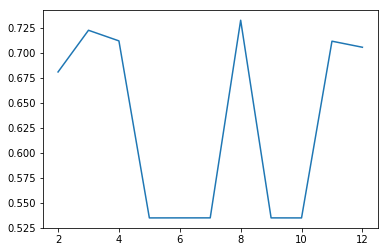

In [37]:
#sim.run(mp.at_every(1 / fcen / 20, mp.output_efield_z), until=1 / fcen)
!rm *.dat
!grep freqs: PIT.out >> PI.dat
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=1
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])

N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

plt.plot(nip,omega[:,:])
omega

In [4]:
#supercell size
nx = 10
ny = 6
nz = 1
r = 0.0725 #rod radius
eps = 32 #material epsilon
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(eps,r,nx,ny,nz,ax,ay,az)

#geometry.append(mp.Cylinder(radius=0.1,axis=mp.Vector3(0,1,0),material=mp.Medium(epsilon=eps)))

dpml = 1.0
cell = mp.Vector3(nx*ax+2*dpml,0,nz*az)

resolution = 25
pml_layers = [mp.PML(dpml,direction=mp.X)]
pos = mp.Vector3(0.0,0,az/8.0)

fcen = 0.54
df = 0.4 
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    k_point = mp.Vector3(0,0,0.2),
                    resolution=resolution)
#kz = 0.2
#sim.k_point = mp.Vector3(0,0,kz)
h = mp.Harminv(mp.Ez, pos, fcen, df)
sim.run(mp.at_beginning(mp.output_epsilon),mp.after_sources(h), until_after_sources=100)
#sim.run(mp.at_beginning(mp.output_epsilon),
#        mp.after_sources(mp.Harminv(mp.Ez, pos, fcen, df)),
#        until_after_sources=100)
mp.output_efield_z(sim)

-----------
Initializing structure...
Meep: using complex fields.
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.188981770271, -3.21859623664e-09, 29357793.9538, 0.917362787804, 0.621555940777-0.674701931916i, 2.3490667809e-09+0.0i
harminv0:, 0.313977168328, -4.60766081952e-08, 3407121.1036, 0.168131322361, -0.160186251586+0.051073538765i, 8.56172782715e-09+0.0i
harminv0:, 0.39531353194, 0.000123174746396, -1604.68579602, 0.0394703410918, 0.0136119230457+0.0370489321965i, 1.48279330815e-08+0.0i
harminv0:, 0.58292483939, -0.00141249940447, 206.345162889, 0.0314166703506, -0.0307630866912+0.00637492534472i, 1.75466587184e-08+0.0i
harminv0:, 0.724995612551, -0.00203297010677, 178.309462135, 0.0790056301773, 0.0697368632942+0.0371303043026i, 4.66411726804e-08+0.0i
harminv0:, 0.776705747682, -0.00500496200795, 77.5935707852, 0.0489093103985, 0.0373178634521-0.0316148337181i, 2.43430336849e-07+0.0i
harminv0:, 0.798175559946, -0.000134326356091, 2971.03108866, 0.04